In [1]:
import os
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Setting the working directory to the root of the project
script_dir = Path(os.getcwd()).resolve()

if script_dir.name == "notebooks":
    print(f"prject dir :: {script_dir.name} ")
    project_dir = script_dir.parent
    print(f"Project dir :: {project_dir}")
else:
    project_dir = script_dir


SOURCEDATA = project_dir / "data"

prject dir :: notebooks 
Project dir :: C:\Users\adbou\source\repos\TAM Recommender


### Importing Data

In [3]:

mccs_json = pd.read_json(SOURCEDATA / "other/mcc.json")
mccs_json.rename(columns={"id": "MCC", "description": "MCC_Description"}, inplace=True)
mccs_json["MCC"] = mccs_json["MCC"].astype(str)

mccs_json


,MCC,MCC_Description
0,742,Veterinary Services
1,763,Agricultural Co-Operatives
2,780,"Horticultural Services, Landscaping Services"
3,1520,General Contractors-Residential And Commercial
4,1711,Air Conditioning Contractors – Sales And Insta...
...,...,...
977,9405,Intra – Government Transactions
978,9700,Automated Referral Service ( For Visa Only)
979,9701,Visa Credential Service ( For Visa Only)
980,9702,Gcas Emergency Services ( For Visa Only)


In [4]:
rewards_df = pd.read_csv(SOURCEDATA/ "Cleaned/rewards_transactions_cleaned.csv")

rewards_df["MCC"] = rewards_df["MCC"].astype(str)

rewards_df = rewards_df.merge(mccs_json, on="MCC", how="left")




In [5]:
rewards_df.head()

,EntityId,EntityName,TrxId,TrxDate,Acronym,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,Country,TotalPaid,MCC,MCC_Description_x,PointsToSpendRatio,Cluster,Cluster_Name,MCC_Description_y
0,1455,Non Participating,15292364,2023-10-02 03:00:00,AMZN Mktp US*T94E30EL0 Amzn.com/bill WA,KWD,976518,456,1848,Students,US,US,22.80,5942,Book Stores,20.000000,1,Very High Spender,Book Stores
1,1455,Non Participating,15292365,2023-10-02 03:00:00,Almaqsura 4086 RIYADH SA,KWD,976518,102,1848,Students,SA,SA,5.11,5912,Drug Stores And Pharmacies,19.960861,1,Very High Spender,Drug Stores And Pharmacies
2,1455,Non Participating,15355552,2023-10-03 03:00:00,CARIBOU COFFEE QURTUBA KW,KWD,976485,16,1854,Youth Sales,KW,KW,1.67,5814,Fast Food Restaurants,9.580838,1,Very High Spender,Fast Food Restaurants
3,1455,Non Participating,15355553,2023-10-03 03:00:00,300 F KUWAIT KW,KWD,976485,98,1854,Youth Sales,KW,KW,9.80,5812,Eating Places And Restaurants,10.000000,1,Very High Spender,Eating Places And Restaurants
4,1455,Non Participating,15355554,2023-10-03 03:00:00,STARBUCKS KUWAIT KW,KWD,981449,10,1845,Solo,KW,KW,1.00,5814,Fast Food Restaurants,10.000000,1,Very High Spender,Fast Food Restaurants


In [6]:
rewards_df = rewards_df[rewards_df["PointsRewarded"] > 0]

### Basic Exploration

In [6]:
rewards_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058515 entries, 1 to 1212606
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   EntityId           1058515 non-null  int64  
 1   EntityName         1058515 non-null  object 
 2   TrxId              1058515 non-null  int64  
 3   TrxDate            1058515 non-null  object 
 4   Acronym            1058515 non-null  object 
 5   Currency           1058515 non-null  object 
 6   FK_BusinessUserId  1058515 non-null  int64  
 7   PointsRewarded     1058515 non-null  int64  
 8   FK_TierId          1058515 non-null  int64  
 9   Tier               1058515 non-null  object 
 10  Location           1058515 non-null  object 
 11  Country            1058515 non-null  object 
 12  TotalPaid          1058515 non-null  float64
 13  MCC                1058515 non-null  object 
 14  MCC_Description    1058063 non-null  object 
dtypes: float64(1), int64(5), object(9)
me

In [7]:
rewards_df.describe()

,EntityId,TrxId,FK_BusinessUserId,PointsRewarded,FK_TierId,TotalPaid
count,1.058515e+06,1.058515e+06,1.058515e+06,1.058515e+06,1.058515e+06,1.058515e+06
mean,1.456260e+03,2.823087e+07,1.031962e+06,1.191357e+02,1.846402e+03,1.013271e+01
std,1.782735e+01,6.706781e+06,4.598807e+04,4.650706e+02,1.091528e+00,3.782193e+01
min,1.455000e+03,1.529236e+07,9.764810e+05,1.000000e+01,1.845000e+03,1.000000e+00
25%,1.455000e+03,2.271435e+07,9.967535e+05,2.500000e+01,1.845000e+03,2.200000e+00
50%,1.455000e+03,2.794046e+07,1.014148e+06,4.500000e+01,1.847000e+03,4.000000e+00
75%,1.455000e+03,3.391828e+07,1.053702e+06,9.000000e+01,1.847000e+03,7.500000e+00
max,1.892000e+03,4.044080e+07,1.164905e+06,6.400000e+04,1.854000e+03,3.016260e+03


### Looking at the mean and the std we can see that there a rewards with high points let's explor further

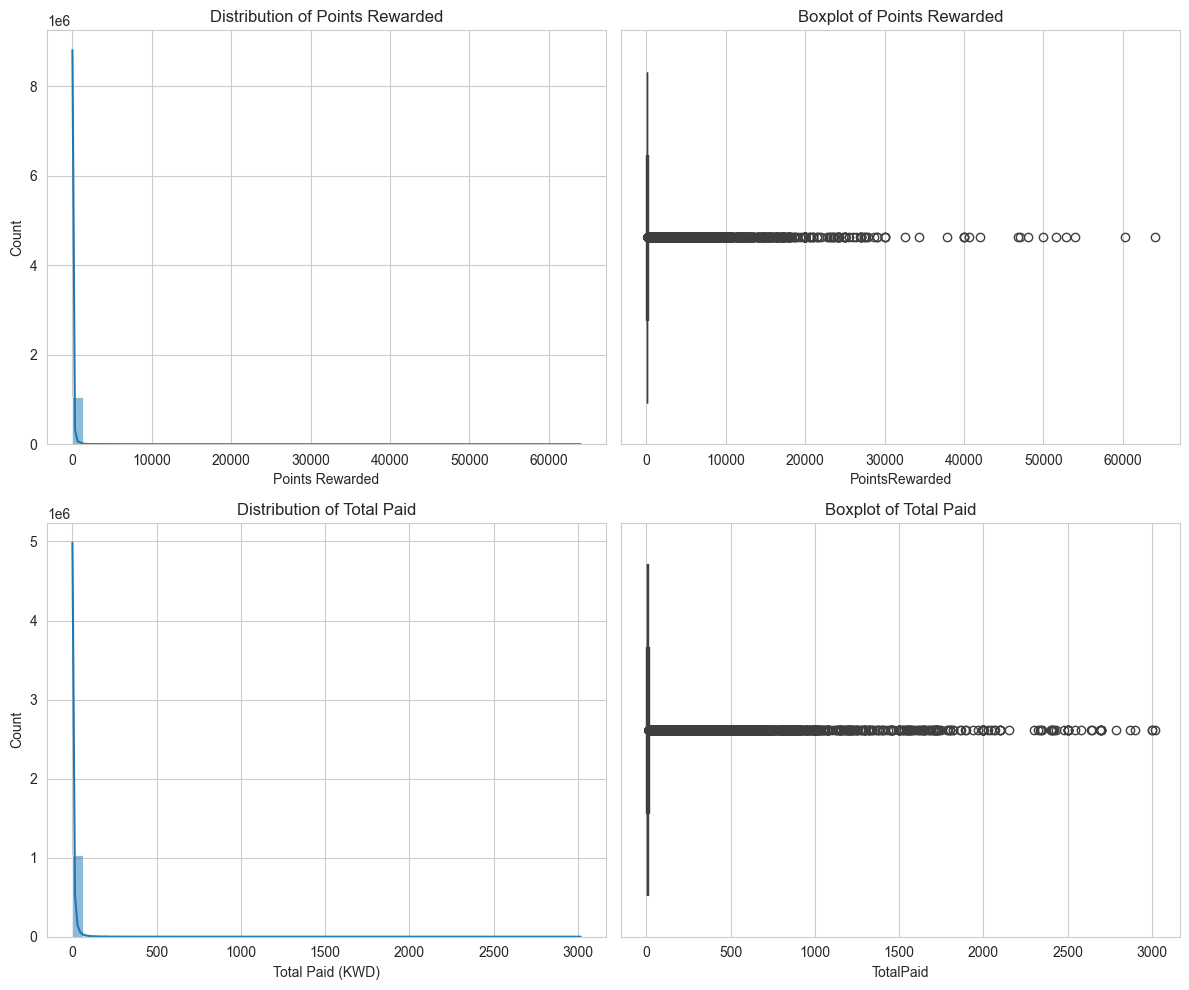

In [8]:
sns.set_style("whitegrid")

#creating subplots

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for PointsRewarded
sns.histplot(rewards_df['PointsRewarded'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Points Rewarded")
axes[0, 0].set_xlabel("Points Rewarded")

# Boxplot for PointsRewarded
sns.boxplot(x=rewards_df['PointsRewarded'], ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Points Rewarded")

# Histogram for TotalPaid
sns.histplot(rewards_df['TotalPaid'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Total Paid")
axes[1, 0].set_xlabel("Total Paid (KWD)")

# Boxplot for TotalPaid
sns.boxplot(x=rewards_df['TotalPaid'], ax=axes[1, 1])
axes[1, 1].set_title("Boxplot of Total Paid")

# Adjusting the layout
plt.tight_layout()
plt.show()

#### Ivestigating why there are users that have huge points rewarded

##### Step 1 : Identifying the Top 5% High Reward Users

In [9]:
# identifying the Top 5 % High reward users

threshold = rewards_df["PointsRewarded"].quantile(0.95)

#filtering them based on the threshold

high_reward_users = rewards_df[rewards_df["PointsRewarded"] >= threshold]

high_reward_users

,EntityId,EntityName,TrxId,TrxDate,Acronym,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,Country,TotalPaid,MCC,MCC_Description
1,1455,Non Participating,15292364,2023-10-02 03:00:00,AMZN Mktp US*T94E30EL0 Amzn.com/bill WA,KWD,976518,456,1848,Students,US,US,22.80,5942,Book Stores
75,1455,Non Participating,15642700,2023-10-15 03:00:00,ARAMEX INTERNATIONAL DUBAI AE,KWD,976518,625,1848,Students,AE,AE,31.27,4215,"Courier Services – Air Or Ground, Freight Forw..."
90,1455,Non Participating,15642685,2023-10-15 03:00:00,HABRA 360 MALL KUWAIT KW,KWD,976485,415,1854,Youth Sales,KW,KW,41.50,5812,Eating Places And Restaurants
101,1455,Non Participating,15621189,2023-10-14 03:00:00,IKEA -AVENUES KUWAIT KW,KWD,976920,1680,1845,Solo,KW,KW,168.00,5712,"Furniture, Home Furnishings, And Equipment Sto..."
104,1455,Non Participating,15621186,2023-10-14 03:00:00,AL GHANIM ELECTRONICS KUWAIT KW,KWD,976920,3198,1845,Solo,KW,KW,319.80,5722,Household Appliance Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212533,1455,Non Participating,40440723,2025-02-16 03:00:00,CHILDRENSALON LTD TUNBRIDGE WEL GB,KWD,1147955,630,1847,Super Hero,GB,GB,63.00,5641,Children’S And Infant’S Wear Stores
1212557,1455,Non Participating,40440747,2025-02-16 03:00:00,ASOS.COM WWW.ASOS.COM/ GB,KWD,1025571,567,1848,Students,GB,GB,28.35,5691,Men’S And Women’S Clothing Stores
1212579,1455,Non Participating,40440769,2025-02-16 03:00:00,NEXT UAE WWW.NEXTDIREC AE,KWD,1041224,1330,1848,Students,AE,AE,66.50,5651,Family Clothing Stores
1212585,1455,Non Participating,40440776,2025-02-16 03:00:00,PAYPAL *FRANKLINTAINOD 4029357733 LU,KWD,1005573,451,1845,Solo,LU,LU,45.13,8999,Professional Services ( Not Elsewhere Defined)


##### Step 2 : Analyzing the Top MCC Categories for High Reward Users

In [10]:
mcc_high_rewards = high_reward_users.groupby("MCC").agg({"PointsRewarded" : "sum" , "TotalPaid":"sum" , "TrxId":"count"}).reset_index()
mcc_high_rewards.rename(columns={"TrxId":"TransactionCount"} , inplace=True)
mcc_high_rewards = mcc_high_rewards.sort_values(by="PointsRewarded", ascending=False)


##### Step 3 : Computing Points-to-Spend Ratio

In [11]:
rewards_df["PointsToSpendRatio"] = rewards_df["PointsRewarded"] / rewards_df["TotalPaid"].replace(0, 1) 
high_reward_users["PointsToSpendRatio"] = high_reward_users["PointsRewarded"] / high_reward_users["TotalPaid"].replace(0, 1)

C:\Users\adbou\AppData\Local\Temp\ipykernel_22212\3526210183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_reward_users["PointsToSpendRatio"] = high_reward_users["PointsRewarded"] / high_reward_users["TotalPaid"].replace(0, 1)


##### Step 4: Analyzing Points Distribution by Tier

In [12]:
tier_points_distribution = rewards_df.groupby("Tier").agg({"PointsRewarded": ["mean", "sum"], "TotalPaid": ["mean", "sum"], "TrxId": "count"}).reset_index()
tier_points_distribution.columns = ["Tier", "AvgPoints", "TotalPoints", "AvgSpend", "TotalSpend", "TransactionCount"]

In [13]:
mcc_high_rewards

,MCC,PointsRewarded,TotalPaid,TransactionCount
124,5399,4151045,323611.24,4262
203,6051,3186765,301082.11,2287
144,5651,3014675,250865.01,3198
125,5411,2986512,251030.75,4185
83,4814,2768005,218007.22,2786
...,...,...,...,...
288,9311,422,42.27,1
66,3824,400,20.00,1
9,2842,400,40.00,1
192,5975,400,40.00,1


In [14]:
tier_points_distribution

,Tier,AvgPoints,TotalPoints,AvgSpend,TotalSpend,TransactionCount
0,Hero,106.233445,23387293,10.308440,2269403.13,220150
1,Solo,81.865529,24630718,7.969547,2397781.66,300868
2,Students,177.943334,32689436,8.902233,1635402.60,183707
3,Super Hero,128.385721,45335309,12.507444,4416603.68,353118
4,Youth Sales,95.462798,64151,9.570104,6431.11,672


In [15]:
# Computing Points-to-Spend Ratio Across Tiers

tier_points_distribution["PointsToSpendRatio"] = tier_points_distribution["TotalPoints"] / tier_points_distribution["TotalSpend"]

tier_points_distribution

,Tier,AvgPoints,TotalPoints,AvgSpend,TotalSpend,TransactionCount,PointsToSpendRatio
0,Hero,106.233445,23387293,10.308440,2269403.13,220150,10.305482
1,Solo,81.865529,24630718,7.969547,2397781.66,300868,10.272294
2,Students,177.943334,32689436,8.902233,1635402.60,183707,19.988617
3,Super Hero,128.385721,45335309,12.507444,4416603.68,353118,10.264745
4,Youth Sales,95.462798,64151,9.570104,6431.11,672,9.975105


In [16]:
#📊 Key Findings

#Students have a significantly higher Points-to-Spend Ratio (19.99) than all other tiers.
#This means Students are earning nearly 2x the points for every KWD spent compared to other tiers.
#Possible Causes:
#A higher reward multiplier for students.
#Exclusive student promotions boosting points.
#Potential reward system imbalance.


### MCC analysis for all users


In [17]:
# Compute MCC reward distribution for all users (not just high-reward users)
mcc_all_users_rewards = rewards_df.groupby("MCC").agg(
    {"PointsRewarded": "sum", "TotalPaid": "sum", "TrxId": "count"}
).reset_index()

# Rename TrxId column to TransactionCount
mcc_all_users_rewards.rename(columns={"TrxId": "TransactionCount"}, inplace=True)

# Compute additional metrics for deeper analysis
mcc_all_users_rewards["PointsToSpendRatio"] = mcc_all_users_rewards["PointsRewarded"] / mcc_all_users_rewards["TotalPaid"].replace(0, 1)
mcc_all_users_rewards["PointsPerTransaction"] = mcc_all_users_rewards["PointsRewarded"] / mcc_all_users_rewards["TransactionCount"].replace(0, 1)

# Sort by PointsToSpendRatio for better visibility
mcc_all_users_rewards_sorted = mcc_all_users_rewards.sort_values(by="PointsToSpendRatio", ascending=False)

mcc_all_users_rewards_sorted


,MCC,PointsRewarded,TotalPaid,TransactionCount,PointsToSpendRatio,PointsPerTransaction
101,4468,406420,11271.08,546,36.058656,744.358974
88,3824,400,20.00,1,20.000000,400.000000
11,3000,12116,605.92,6,19.996039,2019.333333
184,5718,424,21.22,1,19.981150,424.000000
90,3830,1069,53.52,2,19.973842,534.500000
...,...,...,...,...,...,...
87,3811,30,3.04,1,9.868421,30.000000
203,5933,37,3.75,1,9.866667,37.000000
306,7992,93,9.43,2,9.862142,46.500000
343,9405,41,4.17,1,9.832134,41.000000


## Conclusion

#### Right now, some MCCs receive disproportionately high points, while others get little to no rewards. This creates an imbalance in the reward system, where a small group of users accumulates most of the points, while others earn very little.

#### Cap or Scale Down High-Reward MCCs
#### Why? MCCs like 4468 (Unknown), 3000 (Airlines), and 5718 (Furniture) have very high Points-to-Spend Ratios (20-36).
#### Solution:
#### Cap points at a maximum per transaction (e.g., no more than X points per KWD spent).
#### Introduce tiered multipliers: Reduce points as transaction size increases to avoid extreme point accumulation.

#### Increase Rewards for Low-Reward MCCs
#### Why? Some MCCs like Dining (MCC 5814), Convenience Stores (MCC 5499), and Telecom (MCC 4814) earn few or no points.
#### Solution:
#### Boost multipliers for low-reward categories (e.g., increase Dining rewards to 10 points per KWD).
#### Add bonus campaigns: Offer temporary extra points in underperforming MCCs.

#### Implement a Dynamic Reward System
#### Why? A fixed-point system means some users will always exploit high-MCC rewards.
#### Solution:
#### Use a dynamic, demand-based system:
#### If an MCC is over-rewarded, reduce its multiplier over time.
#### If an MCC is under-rewarded, increase its multiplier until engagement improves.


## Other users 

In [18]:
other_users_rewards = rewards_df[rewards_df["PointsRewarded"] < threshold]

other_users_rewards

,EntityId,EntityName,TrxId,TrxDate,Acronym,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,Country,TotalPaid,MCC,MCC_Description,PointsToSpendRatio
2,1455,Non Participating,15292365,2023-10-02 03:00:00,Almaqsura 4086 RIYADH SA,KWD,976518,102,1848,Students,SA,SA,5.11,5912,Drug Stores And Pharmacies,19.960861
4,1455,Non Participating,15355552,2023-10-03 03:00:00,CARIBOU COFFEE QURTUBA KW,KWD,976485,16,1854,Youth Sales,KW,KW,1.67,5814,Fast Food Restaurants,9.580838
5,1455,Non Participating,15355553,2023-10-03 03:00:00,300 F KUWAIT KW,KWD,976485,98,1854,Youth Sales,KW,KW,9.80,5812,Eating Places And Restaurants,10.000000
6,1455,Non Participating,15355554,2023-10-03 03:00:00,STARBUCKS KUWAIT KW,KWD,981449,10,1845,Solo,KW,KW,1.00,5814,Fast Food Restaurants,10.000000
7,1455,Non Participating,15355555,2023-10-03 03:00:00,ALRIFAI KHANSA ST KUWAIT KW,KWD,976482,42,1845,Solo,KW,KW,4.22,5499,Misc. Food Stores – Convenience Stores And Spe...,9.952607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212602,1455,Non Participating,40440794,2025-02-16 03:00:00,TikTok SINGAPORE SG,KWD,1031213,140,1848,Students,SG,SG,7.00,5817,Digital Applications Digital Goods - Applicati...,20.000000
1212603,1455,Non Participating,40440795,2025-02-16 03:00:00,HEALTH PLUS BEAUTY PHUKET TH,KWD,976692,18,1847,Super Hero,TH,TH,1.81,5912,Drug Stores And Pharmacies,9.944751
1212604,1455,Non Participating,40440796,2025-02-16 03:00:00,GOOGLE *YouTubePremium g.co/helppay# CA,KWD,995287,44,1848,Students,US,US,2.23,7829,Motion Pictures And Video Tape Production And ...,19.730942
1212605,1455,Non Participating,40440797,2025-02-16 03:00:00,GOOGLE*FACEBOOK G.CO/HELPPAY# CA,KWD,1015746,47,1847,Super Hero,US,US,4.79,7372,"Computer Programming, Integrated Systems Desig...",9.812109


In [19]:
mcc_high_rewards = other_users_rewards.groupby("MCC").agg({"PointsRewarded" : "sum" , "TotalPaid":"sum" , "TrxId":"count"}).reset_index()
mcc_high_rewards.rename(columns={"TrxId":"TransactionCount"} , inplace=True)
mcc_high_rewards = mcc_high_rewards.sort_values(by="PointsRewarded", ascending=False)

mcc_high_rewards

,MCC,PointsRewarded,TotalPaid,TransactionCount
139,5411,14439253,1308295.45,233409
178,5812,8152399,688325.34,148127
180,5814,7346161,596857.47,170939
177,5811,3907564,349899.15,63091
138,5399,3193575,276070.88,36182
...,...,...,...,...
189,5933,37,3.75,1
75,3811,30,3.04,1
73,3779,21,2.17,1
318,8651,20,2.00,1


### MCC Seasonal Trends

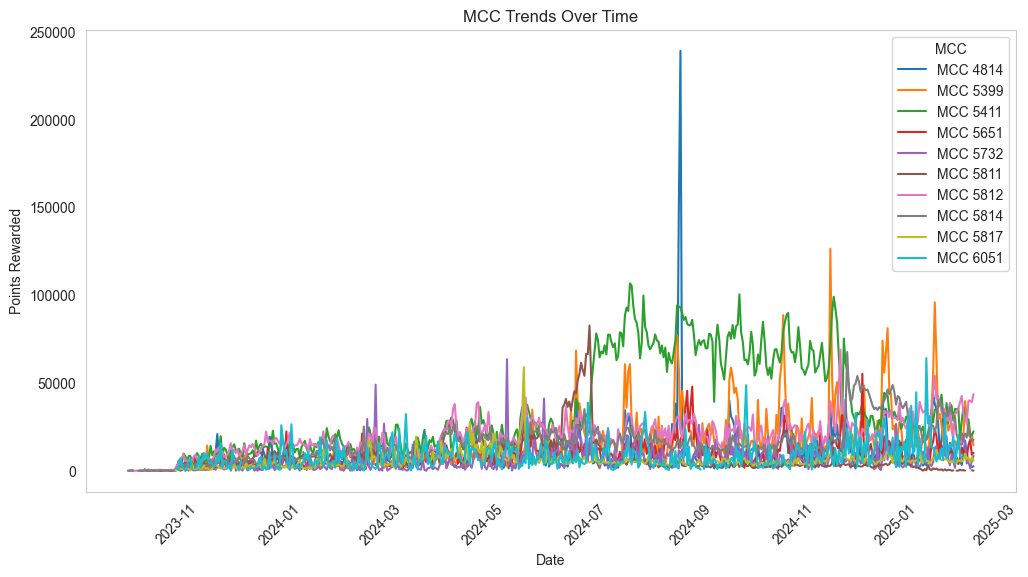

In [20]:
rewards_df["TrxDate"] = pd.to_datetime(rewards_df["TrxDate"])

mcc_time_series = rewards_df.groupby(["TrxDate", "MCC"]).agg({"PointsRewarded": "sum"}).reset_index()

top_mccs = mcc_time_series.groupby("MCC")["PointsRewarded"].sum().nlargest(10).index

mcc_time_series_filtered = mcc_time_series[mcc_time_series["MCC"].isin(top_mccs)]


mcc_pivot = mcc_time_series_filtered.pivot(index="TrxDate", columns="MCC", values="PointsRewarded")

# Plot MCC Trends Over Time
plt.figure(figsize=(12, 6))
for mcc in mcc_pivot.columns:
    plt.plot(mcc_pivot.index, mcc_pivot[mcc], label=f"MCC {mcc}")

plt.xlabel("Date")
plt.ylabel("Points Rewarded")
plt.title("MCC Trends Over Time")
plt.legend(title="MCC")
plt.xticks(rotation=45)
plt.grid()
plt.show()

##### so in cocnlusion the points rewarded are not a definitive one and also total paid because of the fixed reward system in all mcccs so by example a user can buy from  a merchant with mcc 742 (agriculture) an item that have a high price tag and earn two much points from it

##### So the outliers occured because of the fixed reward system A user purchasing an expensive item in MCC Agriculture (742) or Luxury Retail (5691) earns a large number of points because points are awarded proportionally to spending. High-priced categories (electronics, jewelry, travel) have fewer transactions but huge spending, which inflates rewards. Some users (e.g., business customers) might have large transactions compared to normal consumers.

## Computing MCC interest score to see what are top MCC users are interested in

In [9]:
# Computing MCC Interaction Score
mcc_interaction = rewards_df.groupby("MCC").agg(
    TotalPointsRewarded=("PointsRewarded", "sum"),
    TransactionFrequency=("TrxId", "count")
).reset_index()

# Computing MCC Score
mcc_interaction["MCC_Score"] = (
    (mcc_interaction["TotalPointsRewarded"] * mcc_interaction["TransactionFrequency"]) / 
    (mcc_interaction["TotalPointsRewarded"] * mcc_interaction["TransactionFrequency"]).max()
)

# Sorting by MCC Score
mcc_interaction_sorted = mcc_interaction.sort_values(by="MCC_Score", ascending=False)

mcc_interaction_sorted

,MCC,TotalPointsRewarded,TransactionFrequency,MCC_Score
152,5411,17425765,237594,1.000000e+00
192,5812,9872367,150401,3.586284e-01
194,5814,7961141,171713,3.301803e-01
151,5399,7344620,40444,7.174574e-02
191,5811,4070996,63303,6.224402e-02
...,...,...,...,...
343,9405,41,1,9.902766e-12
203,5933,37,1,8.936643e-12
87,3811,30,1,7.245927e-12
85,3779,21,1,5.072149e-12


In [10]:
import numpy as np

# Applying log normalization to MCC_Score for better visibility
mcc_interaction_sorted["MCC_Score_Log"] = np.log1p(mcc_interaction_sorted["MCC_Score"])

# Applying Min-Max scaling to bring values between 0 and 1
mcc_interaction_sorted["MCC_Score_Scaled"] = (mcc_interaction_sorted["MCC_Score"] - mcc_interaction_sorted["MCC_Score"].min()) / (
    mcc_interaction_sorted["MCC_Score"].max() - mcc_interaction_sorted["MCC_Score"].min()
)

mcc_interaction_sorted


,MCC,TotalPointsRewarded,TransactionFrequency,MCC_Score,MCC_Score_Log,MCC_Score_Scaled
152,5411,17425765,237594,1.000000e+00,6.931472e-01,1.000000e+00
192,5812,9872367,150401,3.586284e-01,3.064757e-01,3.586284e-01
194,5814,7961141,171713,3.301803e-01,2.853145e-01,3.301803e-01
151,5399,7344620,40444,7.174574e-02,6.928885e-02,7.174574e-02
191,5811,4070996,63303,6.224402e-02,6.038367e-02,6.224402e-02
...,...,...,...,...,...,...
343,9405,41,1,9.902766e-12,9.902766e-12,5.072149e-12
203,5933,37,1,8.936643e-12,8.936643e-12,4.106025e-12
87,3811,30,1,7.245927e-12,7.245927e-12,2.415309e-12
85,3779,21,1,5.072149e-12,5.072149e-12,2.415309e-13


In [ ]:
#save it to data 

mcc_interaction_sorted["MCC"] = mcc_interaction_sorted["MCC"].astype(str)

mcc_interaction_sorted = mcc_interaction_sorted.merge(mccs_json, on="MCC", how="left")


mcc_interaction_sorted.to_csv(SOURCEDATA / "mcc_scores.csv")

C:\Users\adbou\AppData\Local\Temp\ipykernel_22212\3252832264.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\adbou\AppData\Local\Temp\ipykernel_22212\3252832264.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


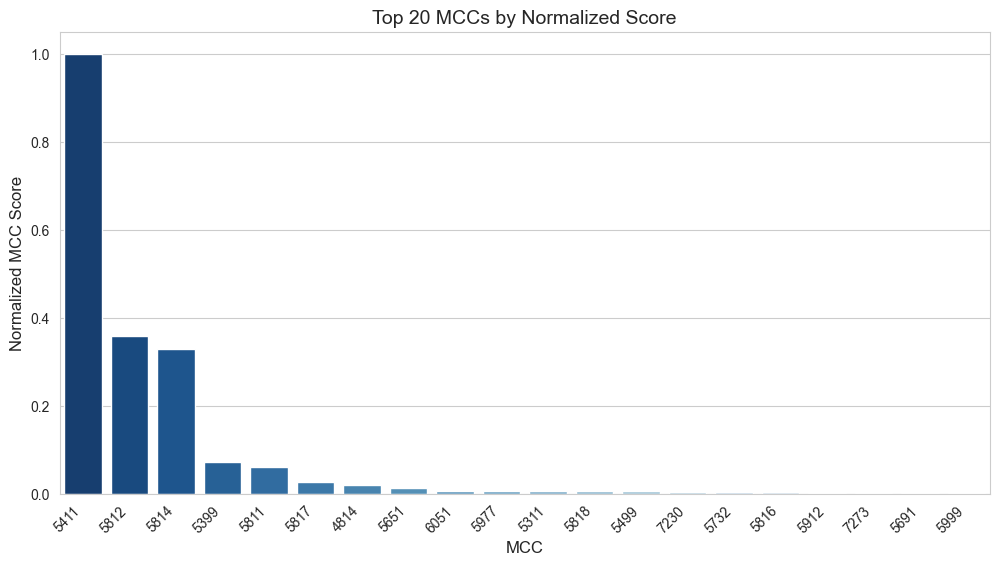

In [24]:
# Select top 20 MCCs for visualization
top_mccs = mcc_interaction_sorted.sort_values(by="MCC_Score", ascending=False).head(20)

# Set up figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart
sns.barplot(
    x=top_mccs["MCC"].astype(str),
    y=top_mccs["MCC_Score_Scaled"],
    palette="Blues_r",
    ax=ax
)

# Labels and title
ax.set_xlabel("MCC", fontsize=12)
ax.set_ylabel("Normalized MCC Score", fontsize=12)
ax.set_title("Top 20 MCCs by Normalized Score", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show plot
plt.show()

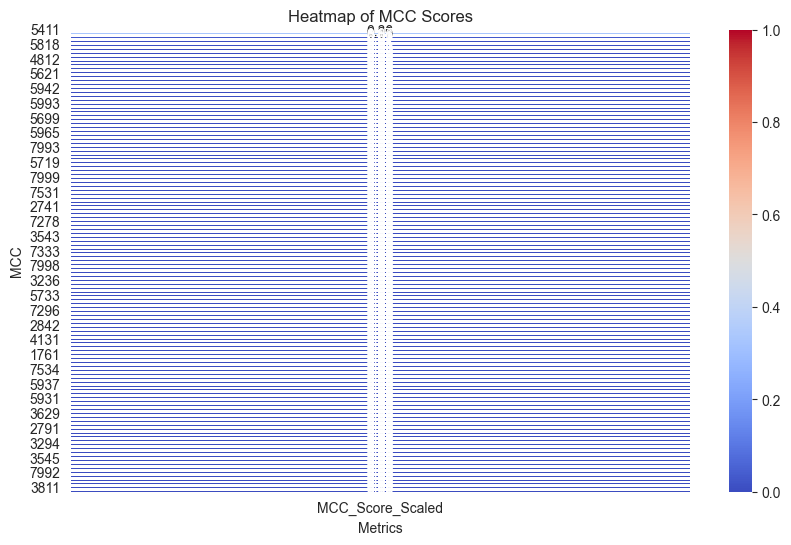

In [25]:
mcc_interaction_sorted.set_index("MCC", inplace=True)

# Heatmap for MCC Scores
plt.figure(figsize=(10, 6))
sns.heatmap(mcc_interaction_sorted[["MCC_Score_Scaled"]], annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of MCC Scores")
plt.xlabel("Metrics")
plt.ylabel("MCC")
plt.show()

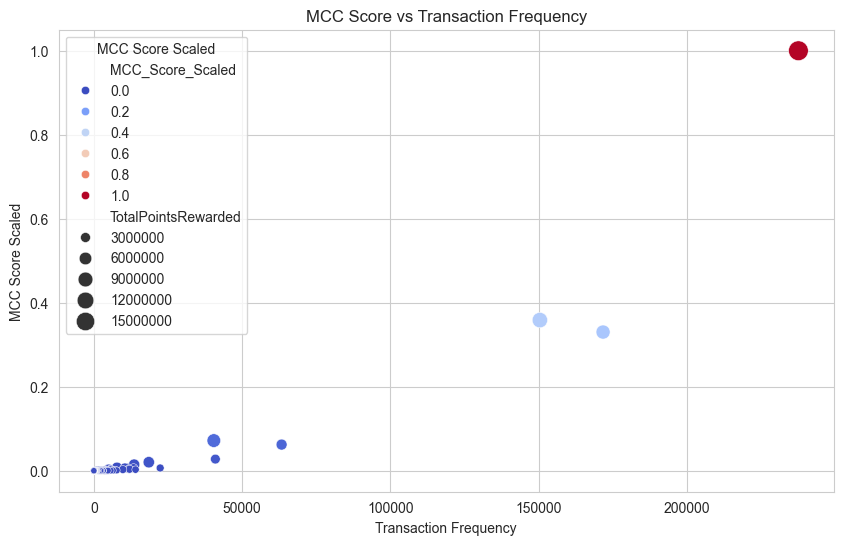

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mcc_interaction_sorted, x="TransactionFrequency", y="MCC_Score_Scaled", hue="MCC_Score_Scaled", palette="coolwarm", size="TotalPointsRewarded", sizes=(20, 200))
plt.title("MCC Score vs Transaction Frequency")
plt.xlabel("Transaction Frequency")
plt.ylabel("MCC Score Scaled")
plt.legend(title="MCC Score Scaled")
plt.grid(True)
plt.show()

### User spending behaviour and segmentation

In [27]:
user_spending = rewards_df.groupby("FK_BusinessUserId").agg(
    Total_Spent=("TotalPaid", "sum"),
    Transaction_Count=("TrxId", "count"),
    Points_Earned=("PointsRewarded", "sum"),
    Unique_MCCs=("MCC", "nunique"),
    Avg_Purchase_Amount=("TotalPaid", "mean")
).reset_index()

In [28]:
user_spending

,FK_BusinessUserId,Total_Spent,Transaction_Count,Points_Earned,Unique_MCCs,Avg_Purchase_Amount
0,976481,1818.29,97,18154,11,18.745258
1,976482,2097.14,167,20934,30,12.557725
2,976483,5064.92,406,56731,56,12.475172
3,976484,1434.87,162,16395,25,8.857222
4,976485,15020.48,1267,174051,85,11.855154
...,...,...,...,...,...,...
23102,1164488,20.00,1,200,1,20.000000
23103,1164512,2.60,1,26,1,2.600000
23104,1164684,10.20,1,102,1,10.200000
23105,1164721,16.45,3,164,3,5.483333


In [29]:
user_spending["Spending_Segment"] = pd.qcut(user_spending["Total_Spent"], q=3, labels=["Low", "Medium", "High"])


In [30]:
user_spending

,FK_BusinessUserId,Total_Spent,Transaction_Count,Points_Earned,Unique_MCCs,Avg_Purchase_Amount,Spending_Segment
0,976481,1818.29,97,18154,11,18.745258,High
1,976482,2097.14,167,20934,30,12.557725,High
2,976483,5064.92,406,56731,56,12.475172,High
3,976484,1434.87,162,16395,25,8.857222,High
4,976485,15020.48,1267,174051,85,11.855154,High
...,...,...,...,...,...,...,...
23102,1164488,20.00,1,200,1,20.000000,Medium
23103,1164512,2.60,1,26,1,2.600000,Low
23104,1164684,10.20,1,102,1,10.200000,Low
23105,1164721,16.45,3,164,3,5.483333,Low


#### Using K-Means and DBSCAN for automated segmentation

In [39]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


user_features = rewards_df.groupby("FK_BusinessUserId").agg(
    Total_Spent=("TotalPaid", "sum"),
    Total_Points=("PointsRewarded", "sum"),
    Transaction_Count=("TrxId", "count"),
    Avg_Spending_Per_Transaction=("TotalPaid", "mean"),  # Average spending per transaction
    Avg_Points_Per_Transaction=("PointsRewarded", "mean")  # Average points per transaction
).reset_index()


# Normalizing Features for Clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(user_features[["Total_Spent", "Total_Points", "Transaction_Count",
                                                      "Avg_Spending_Per_Transaction", "Avg_Points_Per_Transaction"]])

user_features


,FK_BusinessUserId,Total_Spent,Total_Points,Transaction_Count,Avg_Spending_Per_Transaction,Avg_Points_Per_Transaction
0,976481,1818.29,18154,97,18.745258,187.154639
1,976482,2097.14,20934,167,12.557725,125.353293
2,976483,5064.92,56731,406,12.475172,139.731527
3,976484,1434.87,16395,162,8.857222,101.203704
4,976485,15020.48,174051,1267,11.855154,137.372534
...,...,...,...,...,...,...
23102,1164488,20.00,200,1,20.000000,200.000000
23103,1164512,2.60,26,1,2.600000,26.000000
23104,1164684,10.20,102,1,10.200000,102.000000
23105,1164721,16.45,164,3,5.483333,54.666667


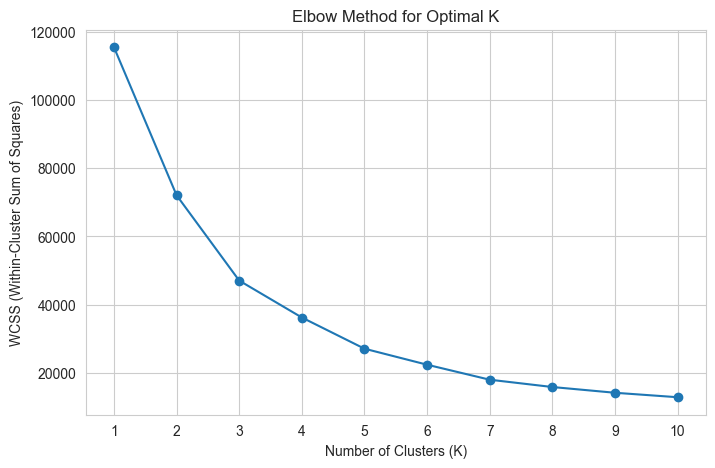

In [40]:
#elbow method to determine best K for K-Means clustering
wcss = []
max_k = 10
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()

In [51]:
# using the elbow method the best K is between for 4 and 5 we will choose 4 for clear segment separation (k = 5 maybe used for more glanuraity)
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(features_scaled)


In [58]:
cluster_mapping = {
    0: "Low Spender",
    1: "Very High Spender",
    2: "Medium Spender",
    3: "High Spender"
}
user_features["Cluster"] = kmeans_labels
user_features["Cluster_Name"] = user_features["Cluster"].map(cluster_mapping)


In [59]:
user_features

,FK_BusinessUserId,Total_Spent,Total_Points,Transaction_Count,Avg_Spending_Per_Transaction,Avg_Points_Per_Transaction,Cluster,Cluster_Name
0,976481,1818.29,18154,97,18.745258,187.154639,0,Low Spender
1,976482,2097.14,20934,167,12.557725,125.353293,3,High Spender
2,976483,5064.92,56731,406,12.475172,139.731527,3,High Spender
3,976484,1434.87,16395,162,8.857222,101.203704,0,Low Spender
4,976485,15020.48,174051,1267,11.855154,137.372534,1,Very High Spender
...,...,...,...,...,...,...,...,...
23102,1164488,20.00,200,1,20.000000,200.000000,0,Low Spender
23103,1164512,2.60,26,1,2.600000,26.000000,0,Low Spender
23104,1164684,10.20,102,1,10.200000,102.000000,0,Low Spender
23105,1164721,16.45,164,3,5.483333,54.666667,0,Low Spender


In [65]:
uui = user_features[user_features["FK_BusinessUserId"] == 1031213]
uui

,FK_BusinessUserId,Total_Spent,Total_Points,Transaction_Count,Avg_Spending_Per_Transaction,Avg_Points_Per_Transaction,Cluster,Cluster_Name
11474,1031213,4742.53,85908,339,13.989764,253.415929,3,High Spender


In [60]:
cluster_validation = user_features.groupby("Cluster_Name").agg(
    Avg_Total_Spent=("Total_Spent", "mean"),
    Avg_Total_Points=("Total_Points", "mean"),
    Avg_Transaction_Count=("Transaction_Count", "mean"),
    Users_Per_Cluster=("Cluster", "count")
).sort_values(by="Avg_Total_Spent", ascending=False)

cluster_validation

,Avg_Total_Spent,Avg_Total_Points,Avg_Transaction_Count,Users_Per_Cluster
Cluster_Name,,,,
Very High Spender,10523.398764,121573.447273,746.938182,275
High Spender,3194.159115,38858.690794,292.259311,1423
Medium Spender,1234.484118,14306.955882,4.470588,68
Low Spender,150.061111,1705.890961,20.473174,21341


In [66]:
#exporting the new clusters (segments) of users to csv

cluster_validation.to_csv(SOURCEDATA / "Cleaned/new_segments.csv")

In [61]:
rewards_df = rewards_df.merge(user_features[["FK_BusinessUserId", "Cluster_Name"]], on="FK_BusinessUserId", how="left")

rewards_df

,EntityId,EntityName,TrxId,TrxDate,Acronym,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,Country,TotalPaid,MCC,MCC_Description,PointsToSpendRatio,Cluster,Cluster_Name
0,1455,Non Participating,15292364,2023-10-02 03:00:00,AMZN Mktp US*T94E30EL0 Amzn.com/bill WA,KWD,976518,456,1848,Students,US,US,22.80,5942,Book Stores,20.000000,1,Very High Spender
1,1455,Non Participating,15292365,2023-10-02 03:00:00,Almaqsura 4086 RIYADH SA,KWD,976518,102,1848,Students,SA,SA,5.11,5912,Drug Stores And Pharmacies,19.960861,1,Very High Spender
2,1455,Non Participating,15355552,2023-10-03 03:00:00,CARIBOU COFFEE QURTUBA KW,KWD,976485,16,1854,Youth Sales,KW,KW,1.67,5814,Fast Food Restaurants,9.580838,1,Very High Spender
3,1455,Non Participating,15355553,2023-10-03 03:00:00,300 F KUWAIT KW,KWD,976485,98,1854,Youth Sales,KW,KW,9.80,5812,Eating Places And Restaurants,10.000000,1,Very High Spender
4,1455,Non Participating,15355554,2023-10-03 03:00:00,STARBUCKS KUWAIT KW,KWD,981449,10,1845,Solo,KW,KW,1.00,5814,Fast Food Restaurants,10.000000,1,Very High Spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058510,1455,Non Participating,40440794,2025-02-16 03:00:00,TikTok SINGAPORE SG,KWD,1031213,140,1848,Students,SG,SG,7.00,5817,Digital Applications Digital Goods - Applicati...,20.000000,1,High Spender
1058511,1455,Non Participating,40440795,2025-02-16 03:00:00,HEALTH PLUS BEAUTY PHUKET TH,KWD,976692,18,1847,Super Hero,TH,TH,1.81,5912,Drug Stores And Pharmacies,9.944751,1,Very High Spender
1058512,1455,Non Participating,40440796,2025-02-16 03:00:00,GOOGLE *YouTubePremium g.co/helppay# CA,KWD,995287,44,1848,Students,US,US,2.23,7829,Motion Pictures And Video Tape Production And ...,19.730942,0,High Spender
1058513,1455,Non Participating,40440797,2025-02-16 03:00:00,GOOGLE*FACEBOOK G.CO/HELPPAY# CA,KWD,1015746,47,1847,Super Hero,US,US,4.79,7372,"Computer Programming, Integrated Systems Desig...",9.812109,0,Very High Spender


In [70]:
#exporting the new rewards transactions of users to csv

rewards_df.to_csv(SOURCEDATA / "Cleaned/rewards_transactions_cleaned.csv",index=False)

In [71]:
new_rewardsdd = pd.read_csv(SOURCEDATA / "Cleaned/rewards_transactions_cleaned.csv")

new_rewardsdd

,EntityId,EntityName,TrxId,TrxDate,Acronym,Currency,FK_BusinessUserId,PointsRewarded,FK_TierId,Tier,Location,Country,TotalPaid,MCC,MCC_Description,PointsToSpendRatio,Cluster,Cluster_Name
0,1455,Non Participating,15292364,2023-10-02 03:00:00,AMZN Mktp US*T94E30EL0 Amzn.com/bill WA,KWD,976518,456,1848,Students,US,US,22.80,5942,Book Stores,20.000000,1,Very High Spender
1,1455,Non Participating,15292365,2023-10-02 03:00:00,Almaqsura 4086 RIYADH SA,KWD,976518,102,1848,Students,SA,SA,5.11,5912,Drug Stores And Pharmacies,19.960861,1,Very High Spender
2,1455,Non Participating,15355552,2023-10-03 03:00:00,CARIBOU COFFEE QURTUBA KW,KWD,976485,16,1854,Youth Sales,KW,KW,1.67,5814,Fast Food Restaurants,9.580838,1,Very High Spender
3,1455,Non Participating,15355553,2023-10-03 03:00:00,300 F KUWAIT KW,KWD,976485,98,1854,Youth Sales,KW,KW,9.80,5812,Eating Places And Restaurants,10.000000,1,Very High Spender
4,1455,Non Participating,15355554,2023-10-03 03:00:00,STARBUCKS KUWAIT KW,KWD,981449,10,1845,Solo,KW,KW,1.00,5814,Fast Food Restaurants,10.000000,1,Very High Spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058510,1455,Non Participating,40440794,2025-02-16 03:00:00,TikTok SINGAPORE SG,KWD,1031213,140,1848,Students,SG,SG,7.00,5817,Digital Applications Digital Goods - Applicati...,20.000000,1,High Spender
1058511,1455,Non Participating,40440795,2025-02-16 03:00:00,HEALTH PLUS BEAUTY PHUKET TH,KWD,976692,18,1847,Super Hero,TH,TH,1.81,5912,Drug Stores And Pharmacies,9.944751,1,Very High Spender
1058512,1455,Non Participating,40440796,2025-02-16 03:00:00,GOOGLE *YouTubePremium g.co/helppay# CA,KWD,995287,44,1848,Students,US,US,2.23,7829,Motion Pictures And Video Tape Production And ...,19.730942,0,High Spender
1058513,1455,Non Participating,40440797,2025-02-16 03:00:00,GOOGLE*FACEBOOK G.CO/HELPPAY# CA,KWD,1015746,47,1847,Super Hero,US,US,4.79,7372,"Computer Programming, Integrated Systems Desig...",9.812109,0,Very High Spender
